# **Forcasting Sales for next 7 days**

## Importing all important librabries which will be in use

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##Reading the dataset using pandas Library

In [ ]:
data = pd.read_csv('/content/data.csv')

Visualizing top 10 rows of our dataset

In [ ]:
data.head(10)

,Unnamed: 0,date,dish_id_1
0,0,2019-01-01,120
1,1,2019-01-02,316
2,2,2019-01-03,302
3,3,2019-01-04,334
4,4,2019-01-05,189
5,5,2019-01-06,109
6,6,2019-01-07,352
7,7,2019-01-08,361
8,8,2019-01-09,369
9,9,2019-01-10,393


 Removing unwanted column which will be of no use

In [ ]:
data.drop(['Unnamed: 0'], axis=1,inplace=True)

Renaming the column names 

In [ ]:
data.columns = ["Date","Sales"]

In [ ]:
# Again checking the top 5 rows
data.head()

,Date,Sales
0,2019-01-01,120
1,2019-01-02,316
2,2019-01-03,302
3,2019-01-04,334
4,2019-01-05,189


# Checking Data types of all columns in the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    209 non-null    object
 1   Sales   209 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.4+ KB


Checking if there is any null values in the dataset 

In [ ]:
data.isnull().sum()

Date     0
Sales    0
dtype: int64

Our date column is of object data type, so we have to convert  into datetime column of pandas

In [ ]:
data["Date"] = pd.to_datetime(data["Date"])

 Resetting the date column to the index

In [ ]:
data.set_index('Date',inplace=True)

In [ ]:
# now checking how our dataset looks like
data.head()

,Sales
Date,
2019-01-01,120
2019-01-02,316
2019-01-03,302
2019-01-04,334
2019-01-05,189


In [ ]:
# Also checking last 5 rows of our dataset
data.tail()

,Sales
Date,
2019-07-27,158
2019-07-28,73
2019-07-29,160
2019-07-30,146
2019-07-31,178


## Descriptive statistics of our dataset

In [ ]:
data.describe()

,Sales
count,209.000000
mean,155.200957
std,97.312037
min,0.000000
25%,85.000000
50%,126.000000
75%,210.000000
max,403.000000


**Plotting our time series data**

Text(0.5, 1.0, 'Time series of Sales')

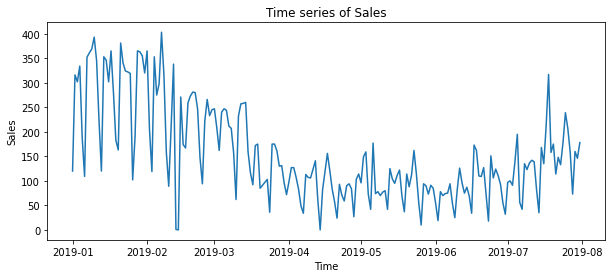

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(data)
plt.xlabel("Time")
plt.ylabel("Sales")
plt.title("Time series of Sales")

## **Checking Seasonability and doing differencing for further making SARIMA model**

We are checking our the stationary condition by doing Augmented Dickey Fuller Test

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
test_result=adfuller(data['Sales'])

In dickey fuller test, we use the concept of Hypothesis testing. Setting the null condidtion to be non stationary and alternative conditon to be stationary.
###Ho: It is non stationary
###H1: It is stationary

If p vale is less than the significance value of 0.05(5%) then we reject our null hypothesis and accept the alternative hypothesis that is 'our time series is Stationary'




In [ ]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

In [ ]:
adfuller_test(data['Sales'])

ADF Test Statistic : -2.060247771431202
p-value : 0.2607965270867544
#Lags Used : 14
Number of Observations Used : 194


Simple checking the model our p-value>0.05, so our time series is not stationary

## Doing first difference on our dataset and storing it into another column 

In [ ]:
data['Seasonal First Difference']=data['Sales']-data['Sales'].shift(1)

In [ ]:
data.head()

,Sales,Seasonal First Difference
Date,,
2019-01-01,120,NaN
2019-01-02,316,196.0
2019-01-03,302,-14.0
2019-01-04,334,32.0
2019-01-05,189,-145.0


In [ ]:
# Applying aft
adfuller_test(data['Seasonal First Difference'].dropna())

ADF Test Statistic : -5.271714504129817
p-value : 6.264822316138901e-06
#Lags Used : 13
Number of Observations Used : 194


In the difference our p-value>0.05, so our time series is not stationary

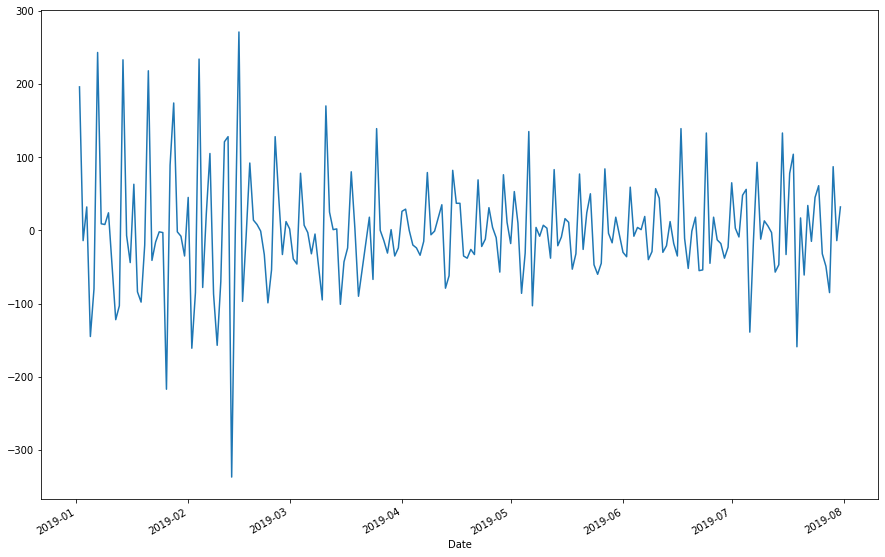

In [ ]:
plt.figure(figsize=(15,10))
data['Seasonal First Difference'].plot()

Doing second difference on our dataset and storing it into another column 

In [ ]:
data['Seasonal Second Difference']=data['Sales']-data['Sales'].shift(2)

In [ ]:
adfuller_test(data['Seasonal Second Difference'].dropna())

ADF Test Statistic : -4.030214925064485
p-value : 0.0012603041340792872
#Lags Used : 15
Number of Observations Used : 191


Ont second difference, our p-value<0.05, so our time series is stationary

## Plotting Autocorrelation and Partial Autocorrelation plots 

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


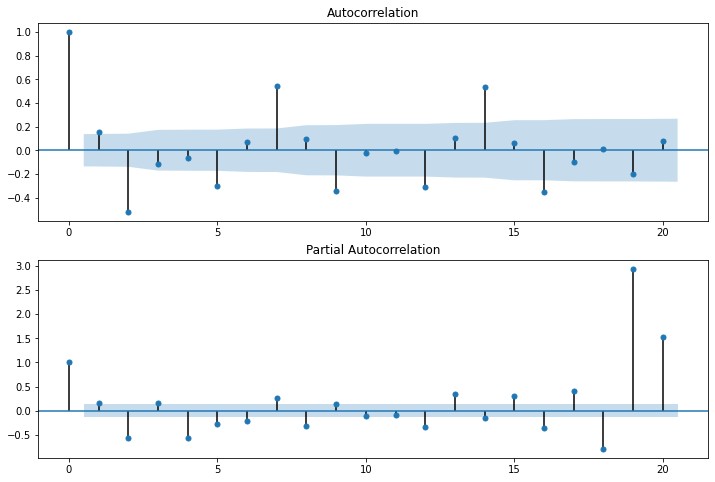

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data['Seasonal Second Difference'].iloc[3:],lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data['Seasonal Second Difference'].iloc[3:],lags=20,ax=ax2)

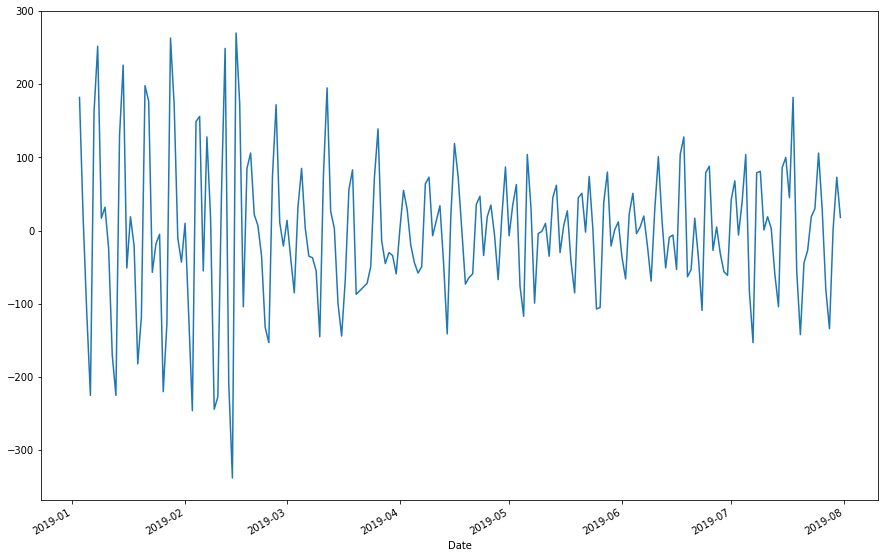

In [ ]:
plt.figure(figsize=(15,10))
data['Seasonal Second Difference'].plot()

In [ ]:
data.head(10)

,Sales,Seasonal First Difference,Seasonal Second Difference
Date,,,
2019-01-01,120,NaN,NaN
2019-01-02,316,196.0,NaN
2019-01-03,302,-14.0,182.0
2019-01-04,334,32.0,18.0
2019-01-05,189,-145.0,-113.0
2019-01-06,109,-80.0,-225.0
2019-01-07,352,243.0,163.0
2019-01-08,361,9.0,252.0
2019-01-09,369,8.0,17.0


The Third order differencing gives us a Stationary time series data 
By visualizing the above acf and pacf plots, we can say that for only one time lag the correlation is effective and after it there is sudden decrease.
We can say that our values of p,d and q are : p=1, d=2, q=1

**Applying SARIMA Model**

In [ ]:
# Importing sarimax model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In SARIMAX model we gives 2 inputs the order and seasonal_order.
order has a form of (p,d,q) and seasonal_order is of form (p,d,q,m).
Above we have learned the values of p,d and q. 
'm' is defined as the seasonal component.In our case 'm' values is 7, because we are seeing the pattern of seasonality in one week.

In [ ]:
my_order = (1,2,1)
my_seasonal_order = (1,2,1,7)

In [ ]:
model = SARIMAX(data['Sales'], order=my_order, seasonal_order=my_seasonal_order)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [ ]:
# Fitting the model
model_fit = model.fit()

Making prediction from index 150 to the last, for checking that our model is working perfectly or not.

In [ ]:
# Storing the predictions in yhat
yhat = model_fit.predict(start=150, end=len(data))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [ ]:
# Resetting the index
yhat=yhat.reset_index()

In [ ]:
yhat

,index,0
0,150,110.368909
1,151,86.834295
2,152,87.008983
3,153,98.534263
4,154,58.816484
5,155,27.752718
6,156,11.211342
7,157,103.607386
8,158,97.800789
9,159,119.955807


storing the original values from index 150 to last in variable y

In [ ]:
y = data['Sales'][150:].values

In [ ]:
y

array([ 78,  70,  74,  75,  94,  54,  25,  82, 126,  96,  75,  87,  69,
        34, 173, 162, 110, 109, 127,  72,  18, 151, 106, 124, 111,  93,
        55,  32,  97, 100,  91, 139, 195,  56,  42, 135, 123, 136, 142,
       139,  82,  35, 168, 135, 213, 317, 158, 175, 114, 148, 133, 178,
       239, 207, 158,  73, 160, 146, 178])

In [ ]:
# Making new dataframe
df = pd.DataFrame()

In [ ]:
df['y']=y

In [ ]:
df['yhat'] = yhat[0]

In [ ]:
df

,y,yhat
0,78,110.368909
1,70,86.834295
2,74,87.008983
3,75,98.534263
4,94,58.816484
5,54,27.752718
6,25,11.211342
7,82,103.607386
8,126,97.800789
9,96,119.955807


## Plotting original and predicted sales values

Text(0.5, 1.0, 'Comparing original and predicted value')

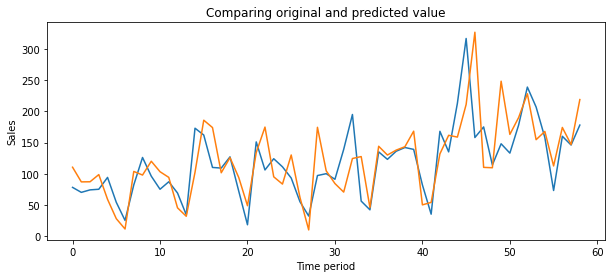

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(df)
plt.xlabel("Time period")
plt.ylabel("Sales")
plt.title("Comparing original and predicted value")

## **Forcasting for next 7 days**

In [ ]:
predictions = model_fit.forecast(7)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [ ]:
predictions

209    266.696242
210    166.350304
211    146.702145
212     72.331552
213    138.626018
214    133.383331
215    181.596495
dtype: float64

In [ ]:
Forcasted = pd.DataFrame()

In [ ]:
Forcasted['Predictions'] = predictions

In [ ]:
Forcasted['date'] = pd.date_range(start='8/1/2019', periods=len(Forcasted), freq='D')


In [ ]:
Forcasted

,Predictions,date
209,266.696242,2019-08-01
210,166.350304,2019-08-02
211,146.702145,2019-08-03
212,72.331552,2019-08-04
213,138.626018,2019-08-05
214,133.383331,2019-08-06
215,181.596495,2019-08-07


In [ ]:
Forcasted.set_index('date', inplace=True)

In [ ]:
Forcasted

,Predictions
date,
2019-08-01,266.696242
2019-08-02,166.350304
2019-08-03,146.702145
2019-08-04,72.331552
2019-08-05,138.626018
2019-08-06,133.383331
2019-08-07,181.596495
